In [12]:
"""
Applying transformations to large files in batches:

BatchProcessor.multi_channel_apply lets you apply transformations to
batches of data where every batch has observations from every channel.

This example show how to process a large file in batches and save the
results to disk.
"""

import logging
import os

import matplotlib.pyplot as plt

from yass.batch import BatchProcessor
from yass.batch import RecordingsReader

In [3]:
# configure logging to get information about the process
logging.basicConfig(level=logging.INFO)

In [14]:
# raw data file
path_to_neuropixel_data = (os.path.expanduser('~/data/ucl-neuropixel'
                           '/rawDataSample.bin'))

# output file
path_to_modified_data = (os.path.expanduser('~/data/ucl-neuropixel'
                         '/tmp/modified.bin'))

In [10]:
# out example function just adds one to every observation
def sum_one(batch):
    """Add one to every element in the batch
    """
    return batch + 1

In [11]:
# create batch processor for the data
bp = BatchProcessor(path_to_neuropixel_data,
                    dtype='int16', n_channels=385, data_format='wide',
                    max_memory='500MB')

# appply a multi channel transformation, each batch will be a temporal
# subset with observations from all selected n_channels, the size
# of the subset is calculated depending on max_memory. Each batch is
# processed and when done, results are save to disk, the next batch is
# then loaded and so on
bp.multi_channel_apply(sum_one,
                       mode='disk',
                       output_path=path_to_modified_data,
                       channels='all')

INFO:yass.batch.batch:Applying function __main__.sum_one...
INFO:yass.batch.batch:__main__.sum_one took 57.981565952301025 seconds


('/Users/Edu/data/ucl-neuropixel/tmp/filtered_multi.bin',
 {'data_format': 'long', 'dtype': 'int16', 'n_channels': 385})

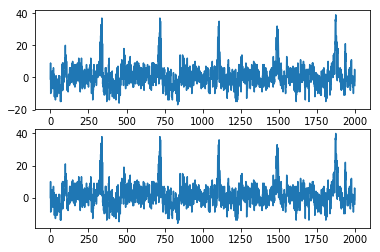

In [13]:
# let's visualize the results
raw = RecordingsReader(path_to_neuropixel_data, dtype='int16',
                       n_channels=385, data_format='wide')

# you do not need to specify the format since multi_channel_apply
# saves a yaml file with such parameters
filtered = RecordingsReader(path_to_modified_data)

fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.plot(raw[:2000, 0])
ax2.plot(filtered[:2000, 0])
plt.show()